###importing required package

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

from pylab import rcParams
rcParams['figure.figsize'] = 8, 8

###Reading the dataset

In [ ]:
data = pd.read_csv("/content/creditcard.csv")

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
# Checking the shape of our data
data.shape

(116942, 31)

In [ ]:
# Checking the distribution of two classes in the target variable
data.Class.value_counts()

,count
Class,
0.0,116697
1.0,244


###Clearly the dataset is heavily imbalanced!

In [ ]:
# Creating the dataset with all independent variables
X = data.iloc[:,:-1]

# Creating the dataset with the dependent variable
Y = data.iloc[:,-1]

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Handle NaN values in 'Y' before splitting
Y = Y.fillna(Y.mean())  # Replace NaN with the mean of 'Y'

# Check for classes with only one member
class_counts = Y.value_counts()
rare_classes = class_counts[class_counts == 1].index.tolist()

# Option 1: Remove rare classes if they are not important
if rare_classes:
    print("Removing rare classes:", rare_classes)
    # Filter out rows corresponding to rare classes from both X and Y
    X = X[~Y.isin(rare_classes)]
    Y = Y[~Y.isin(rare_classes)]

# Option 2: If you absolutely need to keep rare classes, consider oversampling techniques
# (Look into libraries like imblearn for oversampling methods)

# Now proceed with the split, potentially without stratification if rare classes were removed
if rare_classes:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
else:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)

Removing rare classes: [0.0020865222633635765]


In [ ]:
print("The shape of train dataset :")
print(X_train.shape)

print("\n The shape of test dataset :")
print(X_test.shape)

The shape of train dataset :
(93552, 30)

 The shape of test dataset :
(23389, 30)


In [ ]:
print("Distribution of classes of dependent variable in train :")
print(Y_train.value_counts())

print("\n Distribution of classes of dependent variable in test :")
print(Y_test.value_counts())

Distribution of classes of dependent variable in train :
Class
0.0    93361
1.0      191
Name: count, dtype: int64

 Distribution of classes of dependent variable in test :
Class
0.0    23336
1.0       53
Name: count, dtype: int64


In [ ]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 5.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [ ]:
import xgboost as xgb

In [ ]:
dtrain=xgb.DMatrix(X_train,label=Y_train)
dtest=xgb.DMatrix(X_test)

In [ ]:
#setting parameters for xgboost
parameters={'max_depth':7, 'eta':1, 'silent':1,'objective':'binary:logistic','eval_metric':'auc','learning_rate':.05}

In [ ]:
#training our model
num_round=50
from datetime import datetime
start = datetime.now()
xg=xgb.train(parameters,dtrain,num_round)
stop = datetime.now()

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:48:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
#now predicting our model on train set
train_class_preds_probs=xg.predict(dtrain)
#now predicting our model on test set
test_class_preds_probs =xg.predict(dtest)

In [ ]:
#length of pred prob
len(train_class_preds_probs)

93552

In [ ]:
#evaluation from thresold value
train_class_preds = []
test_class_preds = []
for i in range(0,len(train_class_preds_probs)):
  if train_class_preds_probs[i] >= 0.5:
    train_class_preds.append(1)
  else:
    train_class_preds.append(0)

for i in range(0,len(test_class_preds_probs)):
  if test_class_preds_probs[i] >= 0.5:
    test_class_preds.append(1)
  else:
    test_class_preds.append(0)

In [ ]:
#print the array of pred prob
test_class_preds_probs[:20]

array([0.01003628, 0.01003628, 0.01017946, 0.01003628, 0.01003628,
       0.01003628, 0.01003628, 0.01003628, 0.01016026, 0.01023223,
       0.01244416, 0.01003628, 0.01003628, 0.01003628, 0.01003628,
       0.01016026, 0.01016026, 0.01003628, 0.01003628, 0.01003628],
      dtype=float32)

In [ ]:
#length of y train
len(Y_train)

93552

In [ ]:
#lenght of train class pred
len(train_class_preds)

93552

In [ ]:
# Get the accuracy scores
train_accuracy_xgb = accuracy_score(train_class_preds,Y_train)
test_accuracy_xgb = accuracy_score(test_class_preds,Y_test)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", test_accuracy_xgb)

The accuracy on train data is  0.9996900119719514
The accuracy on test data is  0.9995296934456368


In [ ]:
#model evaluation before gdcv
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
test_accuracy_xgb = accuracy_score(test_class_preds,Y_test)
test_precision_xgb = precision_score(test_class_preds,Y_test)
test_recall_score_xgb = recall_score(test_class_preds,Y_test)
test_f1_score_xgb = f1_score(test_class_preds,Y_test)
test_roc_score_xgb = roc_auc_score(test_class_preds,Y_test)

print("The accuracy on test data is ", test_accuracy_xgb)
print("The precision on test data is ", test_precision_xgb)
print("The recall on test data is ", test_recall_score_xgb)
print("The f1 on test data is ", test_f1_score_xgb)
print("The roc_score on train data is ", test_roc_score_xgb)

The accuracy on test data is  0.9995296934456368
The precision on test data is  0.8113207547169812
The recall on test data is  0.9772727272727273
The f1 on test data is  0.88659793814433
The roc_score on train data is  0.9884221850113905


In [ ]:
#grid search cv for xgboost
from xgboost import XGBClassifier
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27),
 param_grid = param_test1, scoring='accuracy',n_jobs=-1, cv=3, verbose = 2)
gsearch1.fit(X_train, Y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_b...e,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=140,
                                     n_jobs=None, nthread=4,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='accuracy', verbose=2)

In [ ]:
#gdcv score after training model on the data set
gsearch1.best_score_

0.9995510518214469

In [ ]:
#optimal xgb
optimal_xgb = gsearch1.best_estimator_

In [ ]:
# Get the predicted classes
train_class_preds = optimal_xgb.predict(X_train)
test_class_preds = optimal_xgb.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy_xgb_tuned = accuracy_score(train_class_preds,Y_train)
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,Y_test)

print("The accuracy on train data is ", train_accuracy_xgb_tuned)
print("The accuracy on test data is ", test_accuracy_xgb_tuned)

The accuracy on train data is  0.9997969043954165
The accuracy on test data is  0.9997007140108598


In [ ]:
#model score for xgboost
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,Y_test)
test_precision_xgb_tuned = precision_score(test_class_preds,Y_test)
test_recall_score_xgb_tuned = recall_score(test_class_preds,Y_test)
test_f1_score_xgb_tuned = f1_score(test_class_preds,Y_test)
test_roc_score_xgb_tuned = roc_auc_score(test_class_preds,Y_test)

print("The accuracy on test data is ", test_accuracy_xgb_tuned)
print("The precision on test data is ", test_precision_xgb_tuned)
print("The recall on test data is ", test_recall_score_xgb_tuned)
print("The f1 on test data is ", test_f1_score_xgb_tuned)
print("The roc_score on test data is ", test_roc_score_xgb_tuned)

The accuracy on test data is  0.9997007140108598
The precision on test data is  0.8867924528301887
The recall on test data is  0.9791666666666666
The f1 on test data is  0.9306930693069307
The roc_score on test data is  0.989454804135784


In [ ]:
#important features respect to Xgb
pd.DataFrame(optimal_xgb.feature_importances_,

                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]

,importance_xgb
14,0.154431
17,0.123642
10,0.109660
7,0.092452
12,0.069398
26,0.027529
4,0.024429
9,0.023808
28,0.023119
22,0.023085


In [ ]:
# Feature Importance
feature_importances_xgb = pd.DataFrame(optimal_xgb.feature_importances_,
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]

In [ ]:
# Feature Importance
feature_importances_xgb = pd.DataFrame(optimal_xgb.feature_importances_,
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]

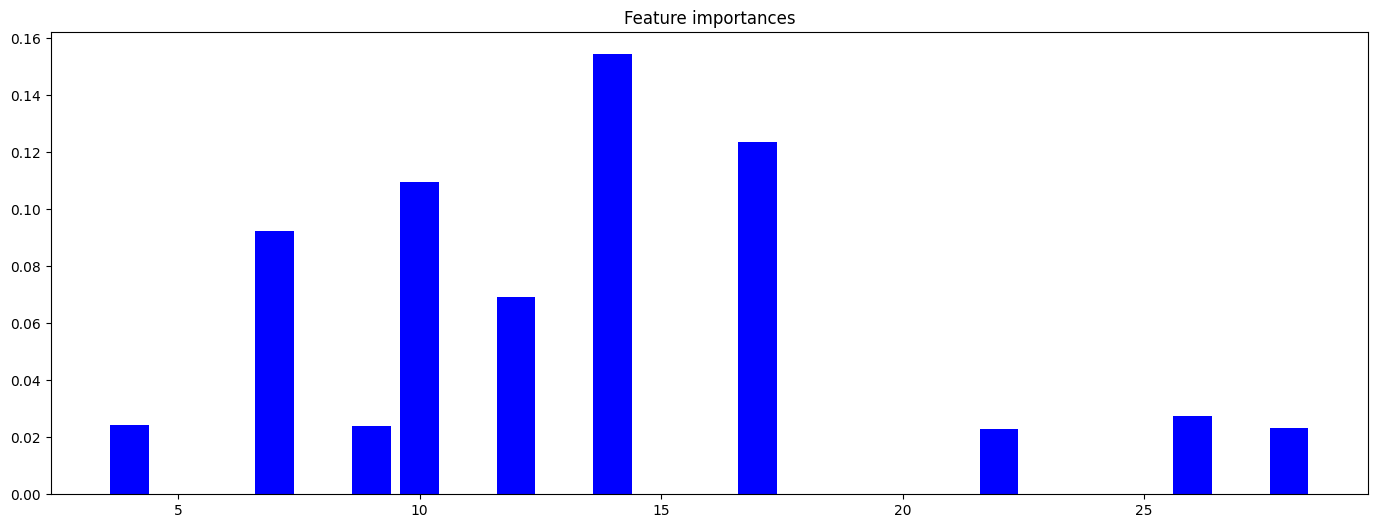

In [ ]:
#plot for the important feature selection by xgb
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_xgb.index, feature_importances_xgb['importance_xgb'],
        color="b",  align="center")
plt.show()

In [ ]:
#y pred after training the model by gdcv
y_preds_proba_xgb = optimal_xgb.predict_proba(X_test)[::,1]

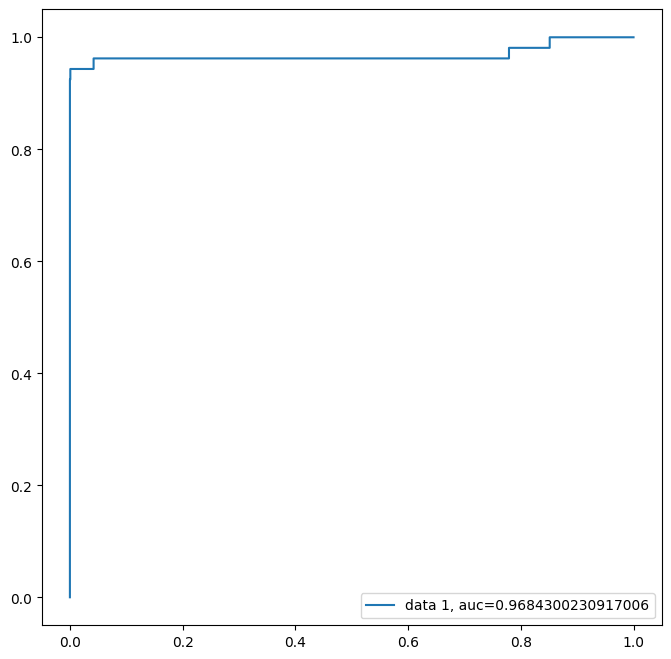

In [ ]:
#plot for the auc-roc for xgb
import sklearn.metrics as metrics
y_pred_proba = y_preds_proba_xgb
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()